# 1. Introduction

### FINDINGS And Questions

1. Total 15 weather stations.
2. Total 1449 unique buildings.
3. 4 types of meters. [0, 1, 2, 3]
4. Why std is so high in square_feet column?
5. We have 117 years of data. Is there potential outlier in years_built column?
6. Do I need to clean the datasets before merging them to train dataset?
7. What is the min/max meter reading, and does it make intuitive sense?
8. primary_use column need to converted to numeric column or dummies columns.

## 2. Library Imports

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

## 3. Exploratory Analysis

In [2]:
train_df = pd.read_csv('./../ashrae-energy-prediction/train.csv')
building_df = pd.read_csv('./../ashrae-energy-prediction/building_metadata.csv')
weather_df = pd.read_csv('./../ashrae-energy-prediction/weather_train.csv')

In [3]:
print(train_df.shape)
print(building_df.shape)
print(weather_df.shape)

(20216100, 4)
(1449, 6)
(139773, 9)


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int64
meter            int64
timestamp        object
meter_reading    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


### Reducing DataFrame Size for Faster Performace

In [5]:
# Memory Statistics
train_df.memory_usage(deep=True) * 1e-6

Index               0.000128
building_id       161.728800
meter             161.728800
timestamp        1536.423600
meter_reading     161.728800
dtype: float64

In [6]:
# Code to chage datatypes of columns
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df['building_id'] = train_df['building_id'].astype("int32")
train_df['meter_reading'] = train_df['meter_reading'].astype("float32")
train_df['meter'] = train_df['meter'].astype("int16")

weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'])

In [7]:
# Check Change in size
train_df.memory_usage(deep=True) * 1e-6

Index              0.000128
building_id       80.864400
meter             40.432200
timestamp        161.728800
meter_reading     80.864400
dtype: float64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int32
meter            int16
timestamp        datetime64[ns]
meter_reading    float32
dtypes: datetime64[ns](1), float32(1), int16(1), int32(1)
memory usage: 347.0 MB


### Merging the datasets using foreign keys

In [9]:
merged_df = train_df.merge(building_df, on='building_id', how='left')

In [11]:
merged_df = merged_df.merge(weather_df, on=['site_id', 'timestamp'], how='left')

In [12]:
merged_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


### a. Analysis of training dataframe

In [13]:
# Display top 5 rows
merged_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [14]:
# Display bottom 5 rows
merged_df.tail()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
20216095,1444,0,2016-12-31 23:00:00,8.750000,15,Entertainment/public assembly,19619,1914.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216096,1445,0,2016-12-31 23:00:00,4.825000,15,Education,4298,NaN,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216097,1446,0,2016-12-31 23:00:00,0.000000,15,Entertainment/public assembly,11265,1997.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216098,1447,0,2016-12-31 23:00:00,159.574997,15,Lodging/residential,29775,2001.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216099,1448,0,2016-12-31 23:00:00,2.850000,15,Office,92271,2001.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [15]:
merged_df.dtypes

building_id                    int32
meter                          int16
timestamp             datetime64[ns]
meter_reading                float32
site_id                        int64
primary_use                   object
square_feet                    int64
year_built                   float64
floor_count                  float64
air_temperature              float64
cloud_coverage               float64
dew_temperature              float64
precip_depth_1_hr            float64
sea_level_pressure           float64
wind_direction               float64
wind_speed                   float64
dtype: object

In [16]:
merged_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
building_id           int32
meter                 int16
timestamp             datetime64[ns]
meter_reading         float32
site_id               int64
primary_use           object
square_feet           int64
year_built            float64
floor_count           float64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtypes: datetime64[ns](1), float32(1), float64(9), int16(1), int32(1), int64(2), object(1)
memory usage: 3.5 GB


In [17]:
# Why std in so high?
merged_df.square_feet.describe()

count    2.021610e+07
mean     1.077830e+05
std      1.171424e+05
min      2.830000e+02
25%      3.252700e+04
50%      7.270900e+04
75%      1.391130e+05
max      8.750000e+05
Name: square_feet, dtype: float64

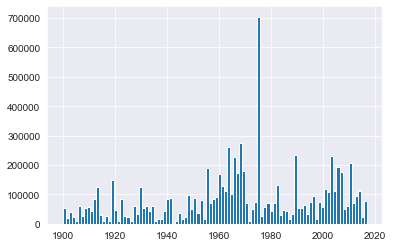

In [18]:
# We have 117 years of data
# Is there potential outlier
merged_df.year_built.hist(bins=100)
plt.show()

In [19]:
merged_df.floor_count.describe()

count    3.506933e+06
mean     4.184848e+00
std      4.008277e+00
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      2.600000e+01
Name: floor_count, dtype: float64

In [20]:
# There are null values in year_built column
merged_df.year_built.isnull().sum()

12127645

In [21]:
# There are lot of null values in floor_count column
merged_df.floor_count.isnull().sum()

16709167

[]

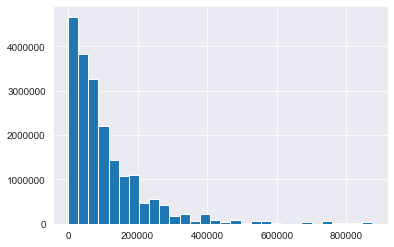

In [22]:
merged_df.square_feet.hist(bins=30)
plt.plot()

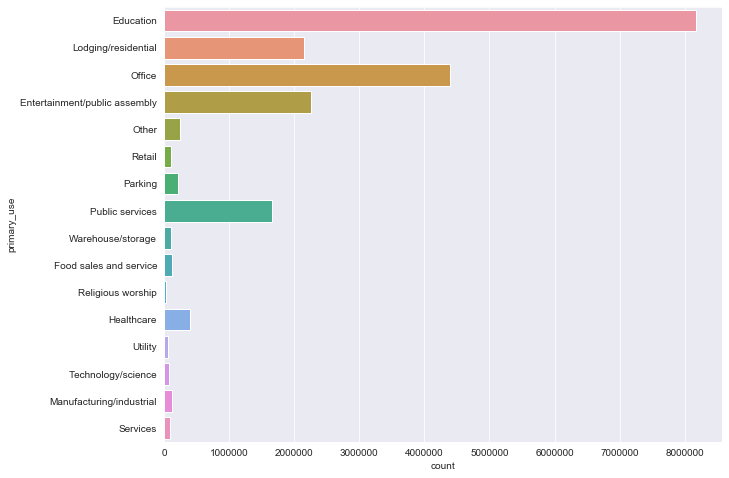

In [23]:
# Do any catrgories need to be combined?
plt.figure(figsize=(10, 8))
sns.countplot(y='primary_use', data=merged_df)
plt.show()

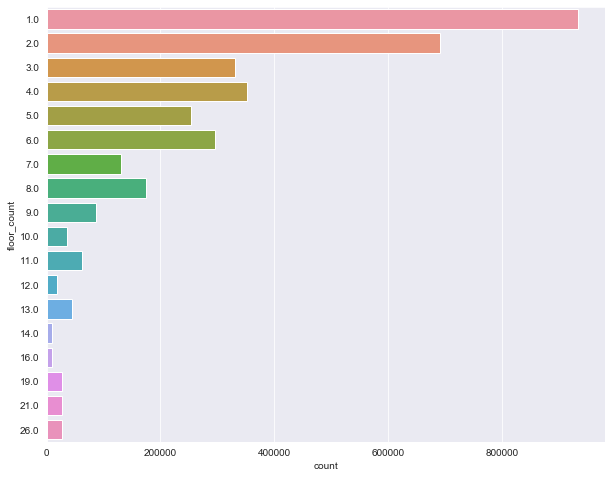

In [24]:
# Will removing floor count affect my model?
plt.figure(figsize=(10, 8))
sns.countplot(y='floor_count', data=merged_df)
plt.show()

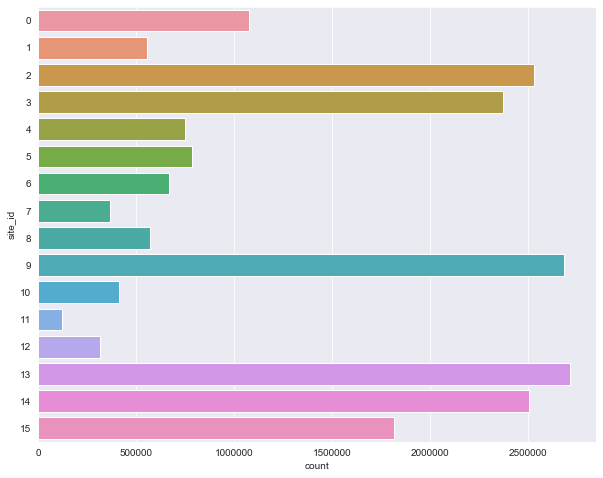

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(y='site_id', data=merged_df)
plt.show()

In [26]:
'''# Uncomment to push changes to github

!git add .
!git commit -m "Merged Datasets"
!git push -u origin master

'''

'# Uncomment to push changes to github\n\n!git add .\n!git commit -m "Merged Datasets"\n!git push -u origin master\n\n'

In [27]:
weather_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [28]:
building_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [35]:
# Thread :- https://www.kaggle.com/c/ashrae-energy-prediction/discussion/112884#latest-658787

temp_df = building_df.merge(weather_df, on='site_id', how='left')

In [41]:
temp_df[temp_df.site_id == 4].head(24)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
4960658,4,565,Education,15326,1954.0,2.0,2016-01-01 01:00:00,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
4960659,4,565,Education,15326,1954.0,2.0,2016-01-01 02:00:00,8.3,0.0,-2.8,0.0,1021.6,0.0,0.0
4960660,4,565,Education,15326,1954.0,2.0,2016-01-01 03:00:00,7.8,0.0,-2.8,0.0,1021.7,90.0,1.5
4960661,4,565,Education,15326,1954.0,2.0,2016-01-01 04:00:00,5.0,0.0,-0.6,0.0,1021.8,0.0,0.0
4960662,4,565,Education,15326,1954.0,2.0,2016-01-01 05:00:00,5.6,0.0,-1.1,0.0,1021.6,130.0,3.1
4960663,4,565,Education,15326,1954.0,2.0,2016-01-01 06:00:00,5.0,0.0,-1.1,0.0,1021.6,160.0,1.5
4960664,4,565,Education,15326,1954.0,2.0,2016-01-01 07:00:00,2.8,0.0,-1.7,0.0,1021.1,NaN,1.5
4960665,4,565,Education,15326,1954.0,2.0,2016-01-01 08:00:00,4.4,0.0,-2.2,0.0,1020.9,0.0,0.0
4960666,4,565,Education,15326,1954.0,2.0,2016-01-01 09:00:00,4.4,0.0,-4.4,0.0,1020.5,20.0,2.1
4960667,4,565,Education,15326,1954.0,2.0,2016-01-01 10:00:00,4.4,0.0,-6.7,0.0,1020.8,20.0,2.1


In [38]:
merged_df[merged_df.site_id == 4].head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
722,565,0,2016-01-01,7.250000,4,Education,15326,1954.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723,566,0,2016-01-01,0.519000,4,Education,2010,1957.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,569,0,2016-01-01,246.000000,4,Education,86091,1964.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,570,0,2016-01-01,79.487999,4,Education,193202,1964.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726,571,0,2016-01-01,17.000000,4,Education,47954,1980.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
merged_df.index = merged_df.timestamp

In [69]:
merged_df

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0,0,2016-01-01 00:00:00,0.000000,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 00:00:00,1,0,2016-01-01 00:00:00,0.000000,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 00:00:00,2,0,2016-01-01 00:00:00,0.000000,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 00:00:00,3,0,2016-01-01 00:00:00,0.000000,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 00:00:00,4,0,2016-01-01 00:00:00,0.000000,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 00:00:00,5,0,2016-01-01 00:00:00,0.000000,0,Education,8000,2000.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 00:00:00,6,0,2016-01-01 00:00:00,0.000000,0,Lodging/residential,27926,1981.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 00:00:00,7,0,2016-01-01 00:00:00,0.000000,0,Education,121074,1989.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 00:00:00,8,0,2016-01-01 00:00:00,0.000000,0,Education,60809,2003.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


## 4. Data Cleaning

### TODOs
1. 
2. 

## 5. Feature Engineering

### TODOs
1. 
2. 

## 6. Algorithm Selection

## 7. Model Training

## 8. Insights and Analysis